### IRIS Dataset for species clasification

###### Importing required Libraries

In [0]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV

# To divide train and test set
from sklearn.model_selection import train_test_split

# To build the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn import datasets

#### Importing data from sklearn

In [0]:
data = datasets.load_iris()

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Description of the Dataset

In [0]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
iris = pd.DataFrame(data['data'],columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Renaming the target variable Species

In [0]:
def flower_type(x):
    if x==0:
        return 'setosa'
    elif x==1:
        return 'versicolor'
    else : return 'virginica'

In [0]:
iris['species'] = pd.Series(data.target).apply(flower_type)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Basic Summary Statistics

In [0]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

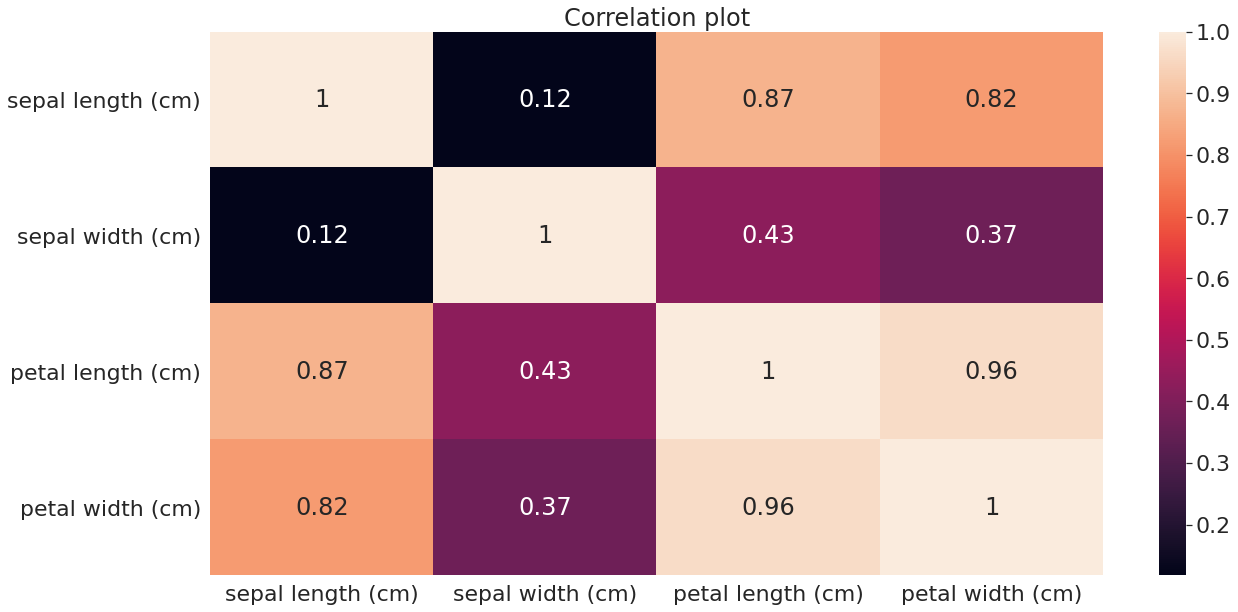

In [0]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.heatmap(iris.corr().abs(),  annot=True);
ax.set_title("Correlation plot");

### Model Building and Evaluation

### Splitting data into train and test

In [0]:
x = iris.drop('species', axis=1)
y= iris['species']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [0]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)
x_scale_test = scale.fit_transform(x_test)

### KNN

Accuracy for Train : 0.9523809523809523
Confusion Matrix for Train :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,34,0,0
Act_versicolor,0,28,4
Act_virginica,0,1,38


Accuracy for Test : 0.9777777777777777
Confusion Matrix for Test :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,16,0,0
Act_versicolor,0,17,1
Act_virginica,0,0,11


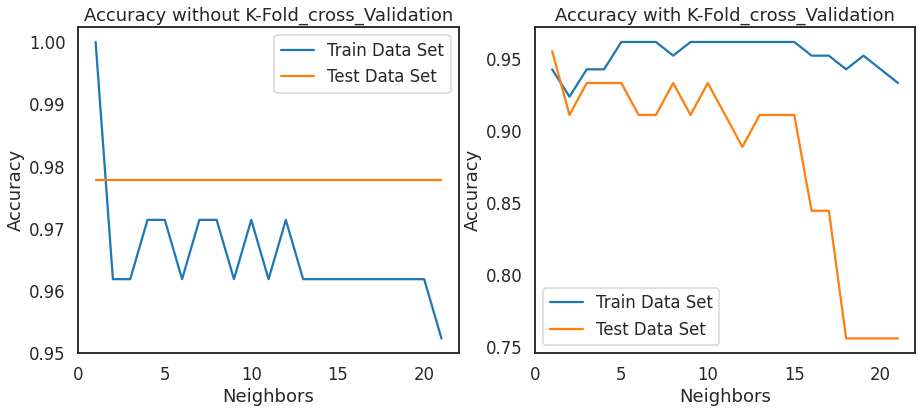

In [0]:
k_neighbors = range(1,22)
train_accuracy = []
test_accuracy = []
train_scores = []
test_scores = []
for n in k_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=n)
    model = KNN.fit(x_train,y_train)
    train_accuracy.append(model.score(x_train,y_train))
    test_accuracy.append(model.score(x_test,y_test))
    train_scores.append(cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean())
    test_scores.append(cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy').mean())

plt.figure(figsize = (15,6))
sns.set_style("white");
sns.set_context("talk",font_scale=1);

plt.subplot(1,2,1)
ax = sns.lineplot(k_neighbors, train_accuracy,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_accuracy,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy without K-Fold_cross_Validation");

plt.subplot(1,2,2)
ax = sns.lineplot(k_neighbors, train_scores,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_scores,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy with K-Fold_cross_Validation");

y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                               index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                              index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

### Decision Tree

In [0]:
Tree = DecisionTreeClassifier(max_depth=5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                               index=['Act_Setosa','Act_versicolor','Act_virginica'])

print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                              index=['Act_Setosa','Act_versicolor','Act_virginica'])

print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 1.0
Confusion Matrix for Train :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,34,0,0
Act_versicolor,0,32,0
Act_virginica,0,0,39


Accuracy for Test : 0.9777777777777777
Confusion Matrix for Test :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,16,0,0
Act_versicolor,0,17,1
Act_virginica,0,0,11


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


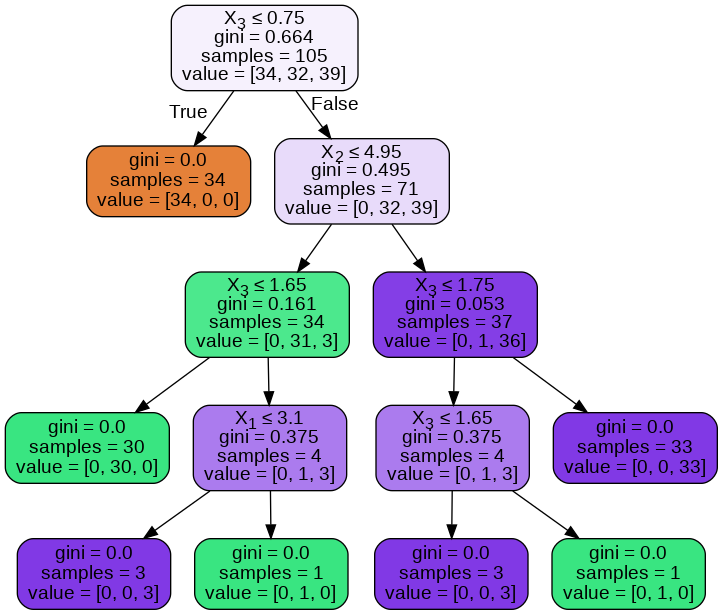

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
tree = StringIO()
export_graphviz(model, out_file=tree,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(tree.getvalue())  
Image(graph.create_png())

### Random forest

In [0]:
Tree = RandomForestClassifier(n_estimators = 50, max_depth = 5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                               index=['Act_Setosa','Act_versicolor','Act_virginica'])

print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],
                              index=['Act_Setosa','Act_versicolor','Act_virginica'])

print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 1.0
Confusion Matrix for Train :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,34,0,0
Act_versicolor,0,32,0
Act_virginica,0,0,39


Accuracy for Test : 0.9777777777777777
Confusion Matrix for Test :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,16,0,0
Act_versicolor,0,17,1
Act_virginica,0,0,11


In [0]:
Feature_importance = pd.DataFrame({"Features":x.columns,"Importance":model.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

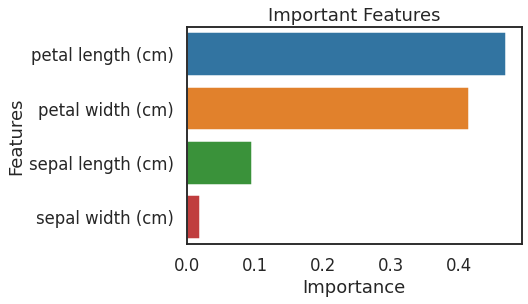

In [0]:
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

### Conclusion :

Above analysis states that Petal features are important in determining the species better compared to sepal features. All the 3 classifiers KNN,Decision Tree and Random Forest Classifiers are giving the same results on the test datasets.